In [ ]:
import os
import glob
import numpy as np
from collections import Counter

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras_preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from keras.models import  Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D, BatchNormalization, Concatenate
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling2D
from keras.utils import np_utils

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import top_k_accuracy_score

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.keras.applications import ResNet50
#Load the ResNet50 model
ResNet50_conv = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in ResNet50_conv.layers:
    layer.trainable = True

# Check the trainable status of the individual layers
for layer in ResNet50_conv.layers:
    print(layer, layer.trainable)

# Create the model
model = models.Sequential()
# Add the vgg convolutional base model
model.add(ResNet50_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(13, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

94781440/94765736 [==============================] - 1s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7f0f13a75d50> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7f0f117ff8d0> True
<keras.layers.convolutional.Conv2D object at 0x7f0f117ffdd0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f0f00317050> True
<keras.layers.core.activation.Activation object at 0x7f0f002b3c10> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7f0f00317810> True
<keras.layers.pooling.MaxPooling2D object at 0x7f0f00289a10> True
<keras.layers.convolutional.Conv2D object at 0x7f0f00248510> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f0f0024de90> True
<keras.layers.core.activation.Activation object at 0x7f0f2d613c90> True
<keras.layers.convolutional.Conv2D object at 0x7f0f00257590> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f0f0025f950> True
<keras.layers.core.

In [ ]:
 # Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-7)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

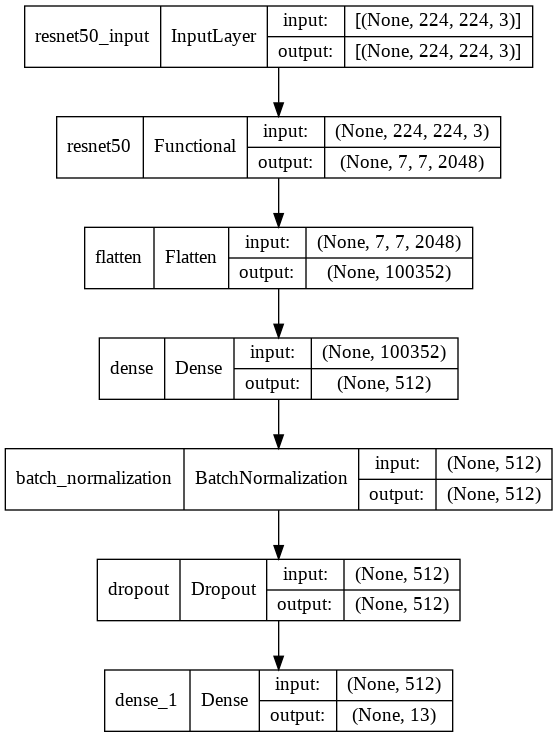

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names = True)
from IPython.display import Image
Image(filename='model.png')

In [ ]:
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/New_8_1/train/',
                                                 target_size = (224, 224),
                                                 shuffle=True)

Found 10590 images belonging to 13 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/New_8_1/val/',
                                            target_size = (224, 224), shuffle=False)

Found 1303 images belonging to 13 classes.


In [ ]:
for cls, idx in training_set.class_indices.items():
    print('Class nr ',idx,' -> ', cls)

Class nr  0  ->  0Capri
Class nr  1  ->  10Pachy
Class nr  2  ->  12Phyll
Class nr  3  ->  14Macro
Class nr  4  ->  1Pnoep
Class nr  5  ->  2Malac
Class nr  6  ->  3Malac
Class nr  7  ->  4Anthi
Class nr  8  ->  5Anthr
Class nr  9  ->  6Corvu
Class nr  10  ->  7Dryoc
Class nr  11  ->  8Elanu
Class nr  12  ->  9Ortho


In [ ]:
model_history = model.fit(training_set, batch_size=16, epochs=7, verbose=1, validation_data=(test_set))

Epoch 1/7
331/331 [==============================] - 3669s 11s/step - loss: 0.8630 - accuracy: 0.7582 - val_loss: 2.6061 - val_accuracy: 0.2126
Epoch 2/7
331/331 [==============================] - 270s 814ms/step - loss: 0.3533 - accuracy: 0.8923 - val_loss: 1.9588 - val_accuracy: 0.3722
Epoch 3/7
331/331 [==============================] - 270s 816ms/step - loss: 0.2255 - accuracy: 0.9318 - val_loss: 1.0739 - val_accuracy: 0.6823
Epoch 4/7
331/331 [==============================] - 271s 817ms/step - loss: 0.1516 - accuracy: 0.9527 - val_loss: 0.5193 - val_accuracy: 0.8596
Epoch 5/7
331/331 [==============================] - 271s 816ms/step - loss: 0.1152 - accuracy: 0.9645 - val_loss: 0.4679 - val_accuracy: 0.8741
Epoch 6/7
331/331 [==============================] - 272s 819ms/step - loss: 0.0917 - accuracy: 0.9714 - val_loss: 0.5622 - val_accuracy: 0.8603
Epoch 7/7
331/331 [==============================] - 271s 819ms/step - loss: 0.0860 - accuracy: 0.9731 - val_loss: 0.5030 - val_acc

In [ ]:
plt.style.use('ggplot')

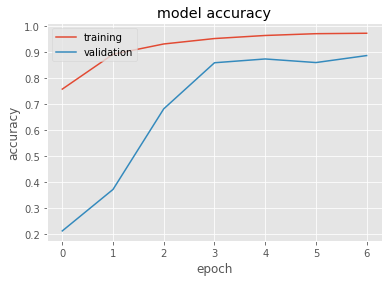

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

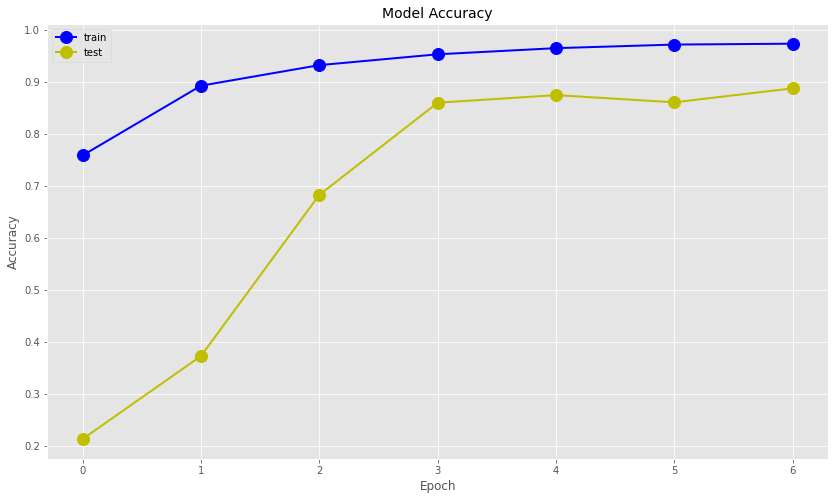

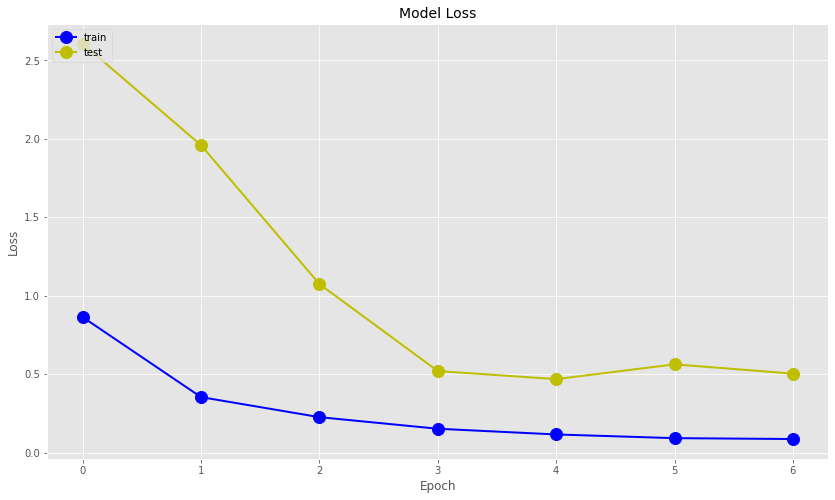

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(model_history.history['accuracy'], 'bo-', linewidth=2, markersize=12)
plt.plot(model_history.history['val_accuracy'], 'yo-', linewidth=2, markersize=12)
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(model_history.history['loss'], 'bo-', linewidth=2, markersize=12 )
plt.plot(model_history.history['val_loss'], 'yo-', linewidth=2, markersize=12)
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
target_names = []
for key in training_set.class_indices:
  target_names.append(key)

print(target_names)

['0Capri', '10Pachy', '12Phyll', '14Macro', '1Pnoep', '2Malac', '3Malac', '4Anthi', '5Anthr', '6Corvu', '7Dryoc', '8Elanu', '9Ortho']


41/41 [==============================] - 11s 261ms/step - loss: 0.5030 - accuracy: 0.8872
n Test_Accuracy:- 0.887183427810669
confusion matrix
[[ 70   1   0   1   1   0   0   4   0   1   1   1   0]
 [  0  41   2   0   0   2   4   1   0   0   3   0   1]
 [  2   1 269   1   1   1   0   2   0   0   0   0   0]
 [  0   0  10 165   1   0   1   2   0   1   1   2   0]
 [  0   0   4   1 141   1   0   1   0   0   0   0   0]
 [  0   0   0   0   2  51   2   0   0   2   0   0   5]
 [  0   1   4   4   1   5  59   3   0   0   2   0   1]
 [  0   0   2   0   2   0   0  36   0   0   0   0   0]
 [  3   0   3   0   0   0   0   0  35   3   3   1   0]
 [  3   0   0   3   0   0   0   0   2  63   0   0   0]
 [  0   0   2   5   0   3   3   0   5   2  35   0   3]
 [  0   1   0   1   0   0   0   0   0   0   0 136   0]
 [  0   1   4   2   0   0   0   0   0   0   2   0  55]]


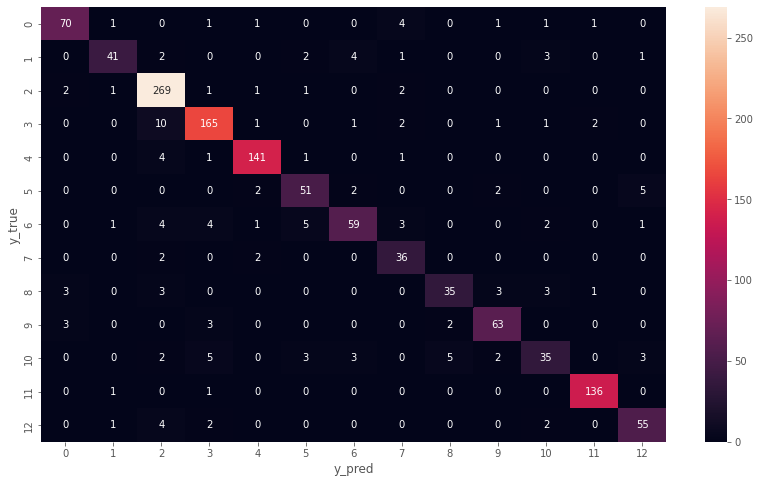

In [ ]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set.classes, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names ))

Classification Report
              precision    recall  f1-score   support

      0Capri       0.90      0.88      0.89        80
     10Pachy       0.89      0.76      0.82        54
     12Phyll       0.90      0.97      0.93       277
     14Macro       0.90      0.90      0.90       183
      1Pnoep       0.95      0.95      0.95       148
      2Malac       0.81      0.82      0.82        62
      3Malac       0.86      0.74      0.79        80
      4Anthi       0.73      0.90      0.81        40
      5Anthr       0.83      0.73      0.78        48
      6Corvu       0.88      0.89      0.88        71
      7Dryoc       0.74      0.60      0.67        58
      8Elanu       0.97      0.99      0.98       138
      9Ortho       0.85      0.86      0.85        64

    accuracy                           0.89      1303
   macro avg       0.86      0.84      0.85      1303
weighted avg       0.89      0.89      0.89      1303



In [ ]:
target_names1 = []
for key in test_set.class_indices:
  target_names1.append(key)

print(target_names1)

['0Capri', '10Pachy', '12Phyll', '14Macro', '1Pnoep', '2Malac', '3Malac', '4Anthi', '5Anthr', '6Corvu', '7Dryoc', '8Elanu', '9Ortho']


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

ROC AUC score: 0.9176423205188546


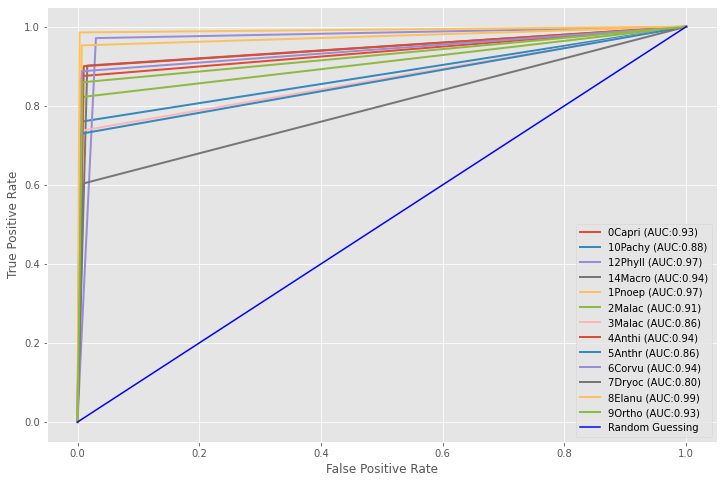

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_preds, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_preds = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target_names1):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_preds[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)), linewidth=2)
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_preds, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(test_set.classes, pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=5)

0.9815809669992326

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=5, normalize=False)

1279

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=1)

0.8871834228702993

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=1, normalize=False)

1156

In [ ]:
model.save('/content/drive/MyDrive/Birddata_split/resnet50_mels9.hdf5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
finalpreds = pd.DataFrame(y_pred)
finalpreds.to_csv('/content/drive/MyDrive/Birddata_split/submit9.csv',index=False)